In [79]:
import numpy as np
import pandas as pd

In [80]:
data=pd.read_csv("titanic1.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
data.shape

(891, 12)

In [82]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
data=data.drop(["Name"],axis=1)

In [84]:
x.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
#Since the column Cabin has Maximum number of Null values which is not possible to debug ,so we can drop this Column.

In [86]:
data=data.drop({"Cabin","Ticket"},axis=1)

In [87]:
data.fillna(data.median(),inplace=True)

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

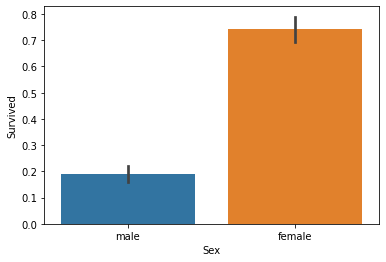

In [89]:
sns.barplot(x="Sex",y="Survived",data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

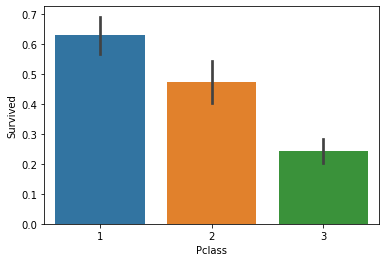

In [90]:
sns.barplot(x='Pclass',y='Survived',data=data)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

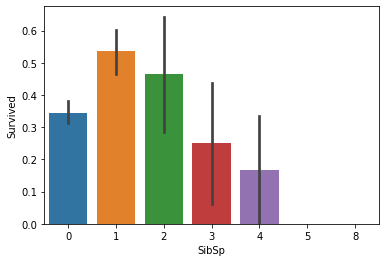

In [91]:
sns.barplot(x='SibSp',y='Survived',data=data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

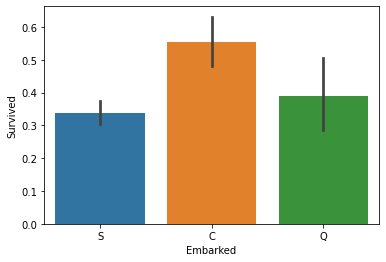

In [92]:
sns.barplot(x='Embarked',y='Survived',data=data)

In [93]:
#Filling Null values in Embarked Column and Convert it into Integers

In [94]:
data["Embarked"].fillna('S',inplace=True)

In [95]:
data["Embarked"].replace({'S':1,'Q':2,'C':3},inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [97]:
#Now we Converted every columns into a float and Integers

In [98]:
#outliers

In [99]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.264823
dtype: float64

In [100]:
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))
data['SibSp']=data['SibSp'].clip(lower=data['SibSp'].quantile(0.05),upper=data['SibSp'].quantile(0.95))
data['Parch']=data['Parch'].clip(lower=data['Parch'].quantile(0.05),upper=data['Parch'].quantile(0.95))
data['Fare']=data['Fare'].clip(lower=data['Fare'].quantile(0.05),upper=data['Fare'].quantile(0.95))

<AxesSubplot:xlabel='Fare'>

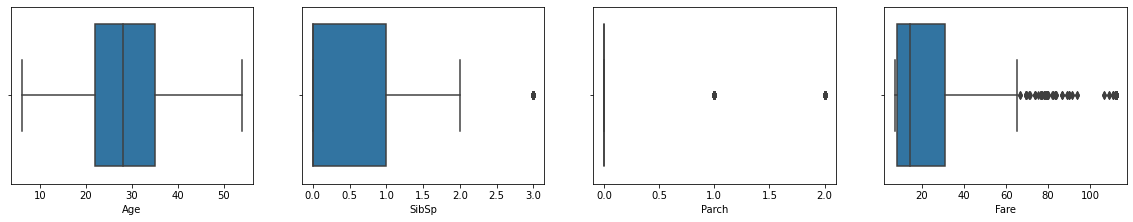

In [101]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Age'])
plt.subplot(4,4,2)
sns.boxplot(data['SibSp'])
plt.subplot(4,4,3)
sns.boxplot(data['Parch'])
plt.subplot(4,4,4)
sns.boxplot(data['Fare'])

In [102]:
data['Fare']=data['Fare'].clip(lower=data['Fare'].quantile(0.15),upper=data['Fare'].quantile(0.85))

In [103]:
data['SibSp']=data['SibSp'].clip(lower=data['SibSp'].quantile(0.07),upper=data['SibSp'].quantile(0.93))

<AxesSubplot:xlabel='Fare'>

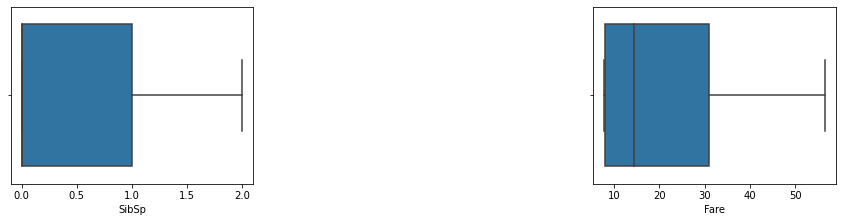

In [104]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['SibSp'])
plt.subplot(4,4,3)
sns.boxplot(data['Fare'])

In [105]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.280973
SibSp          1.339934
Parch          1.679480
Fare           0.944933
Embarked       1.264823
dtype: float64

In [106]:
#Checking Datas using correlation Heatmap

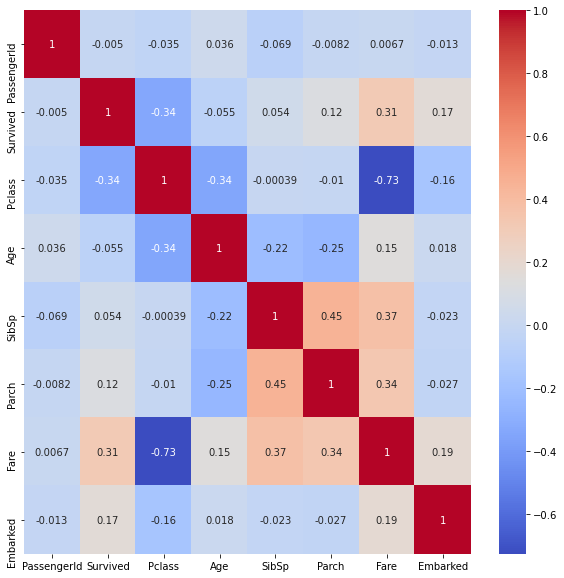

In [107]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [108]:
numeric_variables=['PassengerId','Pclass','Age','SibSp','Parch','Fare']

data[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.7500
1,2,1,38.0,1,0,56.4958
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [109]:
data['Age'].isnull().sum()

0

In [110]:
y=x['Survived']

In [111]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)
# training the model...
model.fit(x[numeric_variables],y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').